In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('ElectricCarData_Clean.csv')
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [3]:
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [4]:

df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


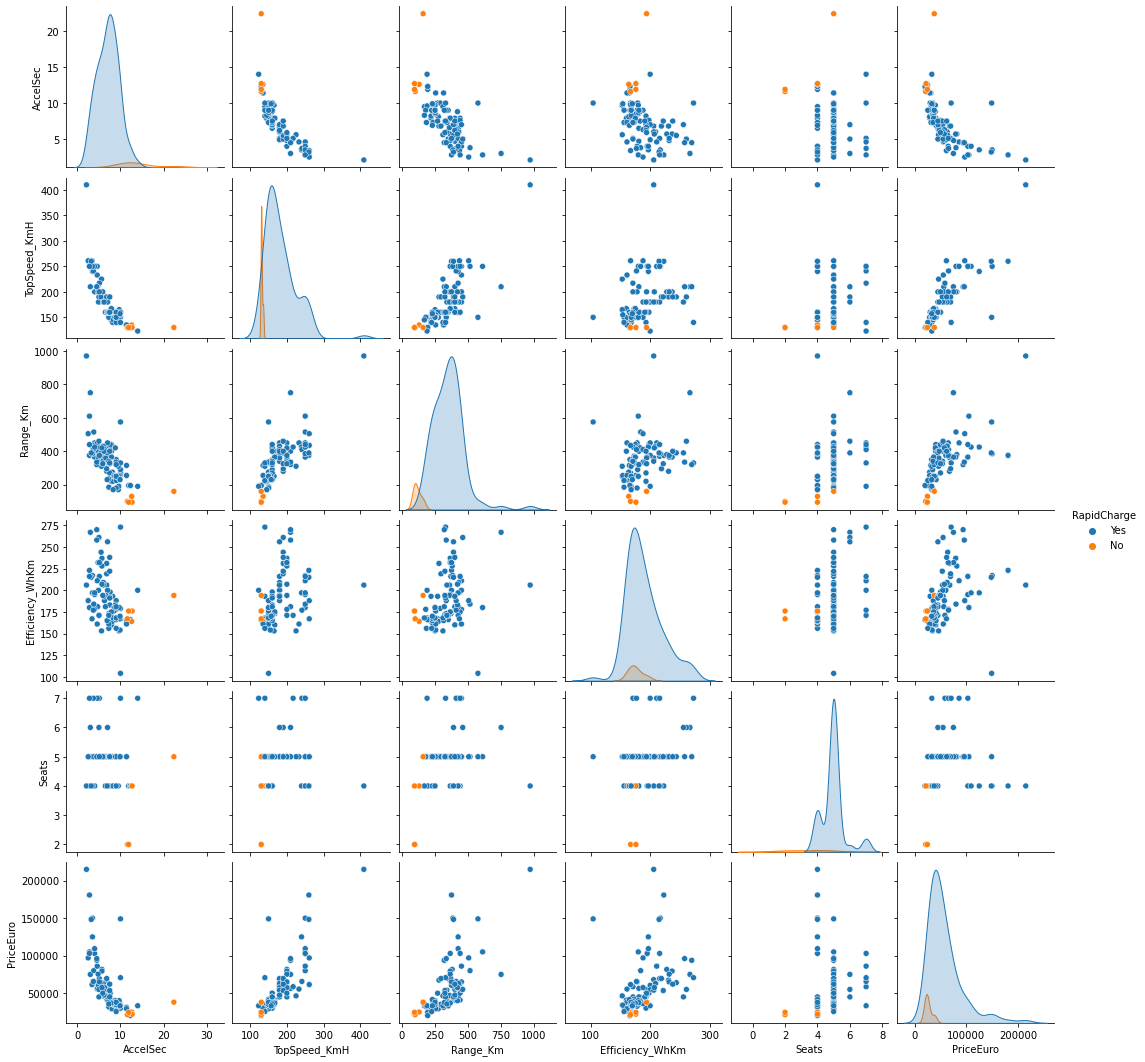

In [5]:
sns.pairplot(df,hue='RapidCharge')

<AxesSubplot:>

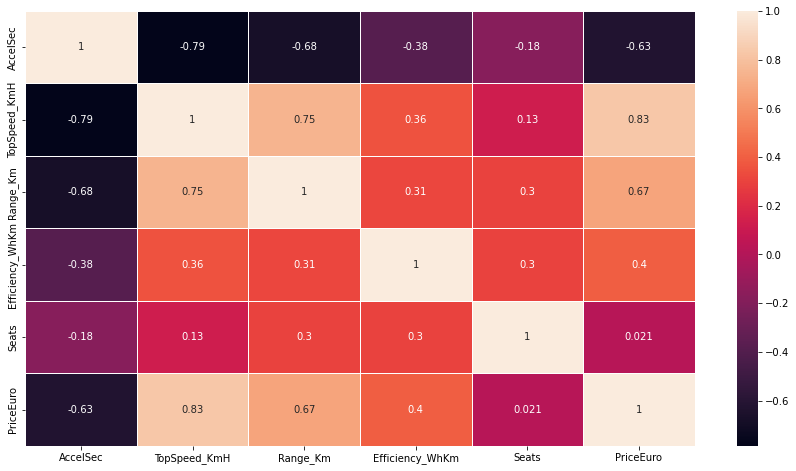

In [7]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


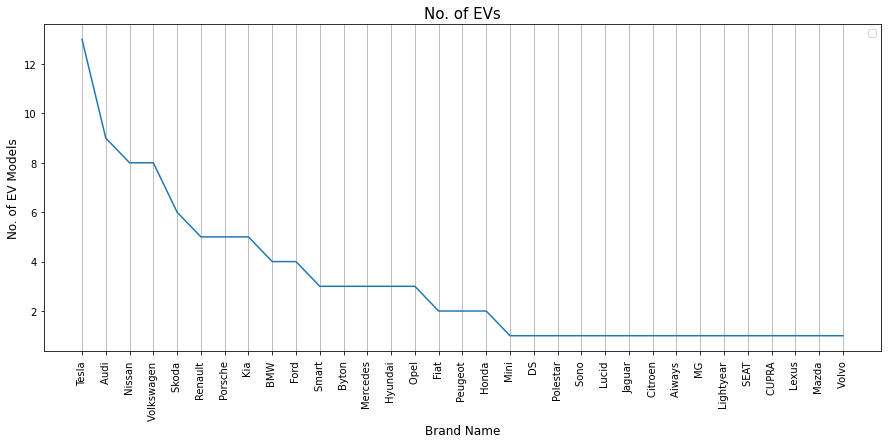

In [8]:
# Total number of models from respected brand
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.legend()
plt.xlabel("Brand Name",fontsize=12)
plt.ylabel("No. of EV Models",fontsize=12)
plt.title('No. of EVs',fontsize=15)
plt.plot(df['Brand'].value_counts(), label='No. of Models')
plt.show()

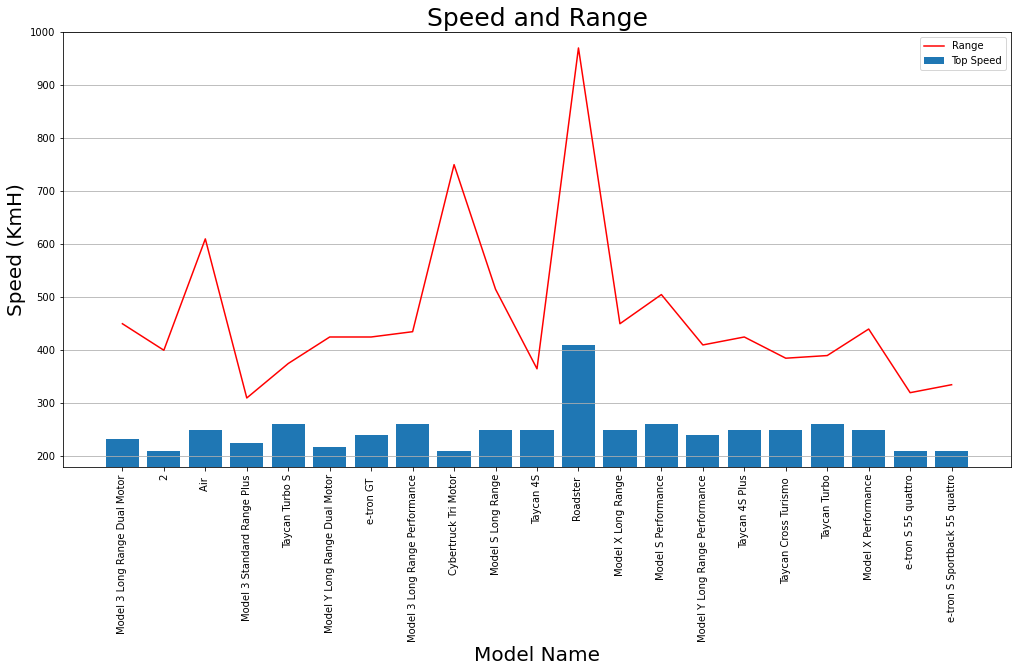

In [9]:
# Top Speed and Range filtration
df2 = df[df['TopSpeed_KmH']>200] # speed more than 200KmH

plt.figure(figsize=(17,8))
plt.title("Speed and Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=180,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Speed (KmH)",fontsize=20)
plt.bar(df2['Model'],df2['TopSpeed_KmH'],label='Top Speed') # Bar graph showing Top Speed
plt.plot(df2['Model'],df2['Range_Km'],label='Range',c='r') # Line graph showing Range of vehicle
plt.legend()

There are much of models speed above 200kmH and subsequently with the range

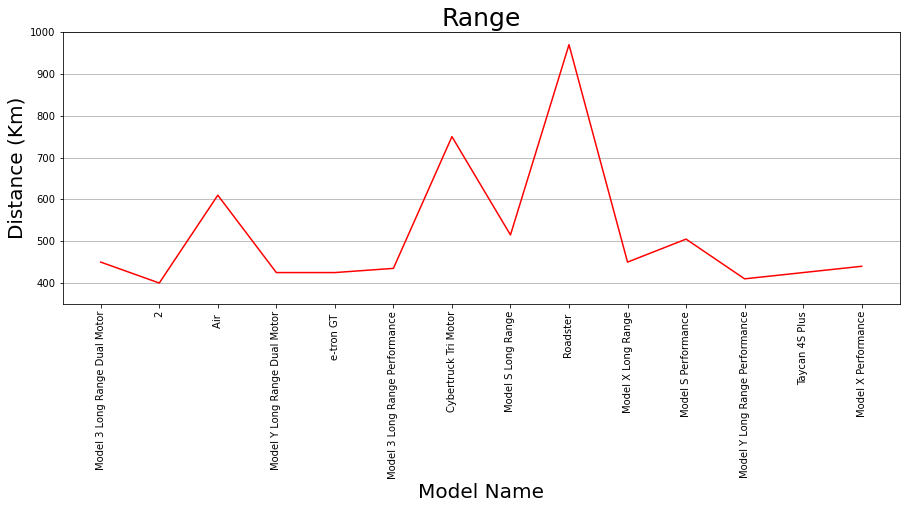

In [10]:
# Filteration of models related to Range
df3 = df2[df2['Range_Km']>=400] # Range above 400 km

plt.figure(figsize=(15,5))
plt.title("Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=350,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Distance (Km)",fontsize=20)
plt.plot(df3['Model'],df3['Range_Km'],label='Range',c='r')

Models having range higher than 400Km with speed above 200KmH

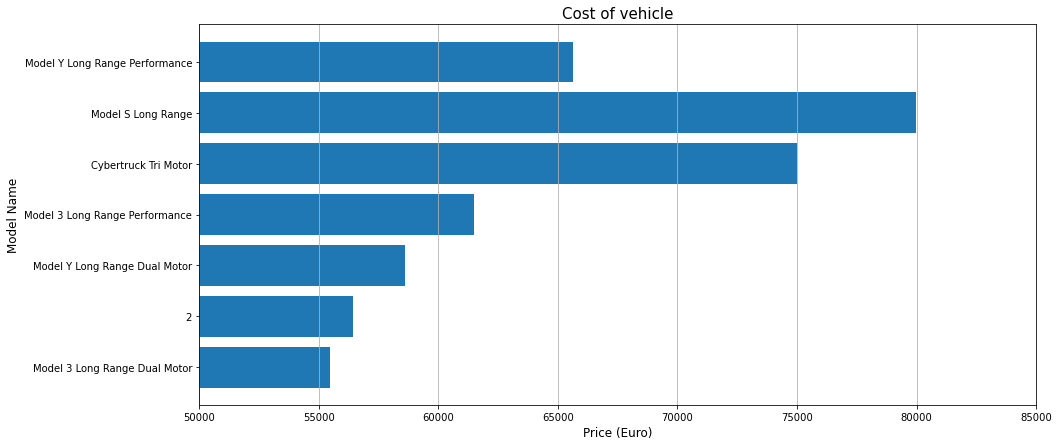

In [11]:
#Filteration according to Price Range
df4 = df3[df3['PriceEuro']>50000] # cost greater than 50000 Euros
df5 =df4[df4['PriceEuro']<80000] # cost less than 80000 Euros

plt.figure(figsize=(15,7))
plt.title("Cost of vehicle",fontsize=15)
plt.xticks(rotation = 0)
plt.grid(axis='x')
plt.xlim(50000,85000)
plt.ylabel("Model Name",fontsize=12)
plt.xlabel("Price (Euro)",fontsize=12)
plt.barh(df5['Model'],df5['PriceEuro'],label='Range')
plt.show()

This shows the top speed of around more than 400KmH is the Roadster which is from tesla and other models that are quiet good in top speed

This is the list of vehicle with specifications that satisfies the condition of

eg. A person wnted to buy a vehicle which must be an EV with the top speed more than 200 KmH and range more than 400 Km. They are 4 person family and working so budget is around 50000 euros to 80000 euros (this is the budget more than 60% people look for)

In [12]:
df5.style.hide_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_10668\2622142094.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df5.style.hide_index()


Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Tesla,Model 3 Long Range Dual Motor,4.600000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
Polestar,2,4.700000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
Tesla,Model Y Long Range Dual Motor,5.100000,217,425,171,930,Yes,AWD,Type 2 CCS,SUV,D,7,58620
Tesla,Model 3 Long Range Performance,3.400000,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
Tesla,Cybertruck Tri Motor,3.000000,210,750,267,710,Yes,AWD,Type 2 CCS,Pickup,N,6,75000
Tesla,Model S Long Range,3.800000,250,515,184,560,Yes,AWD,Type 2,Liftback,F,5,79990
Tesla,Model Y Long Range Performance,3.700000,241,410,177,900,Yes,AWD,Type 2 CCS,SUV,D,7,65620


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

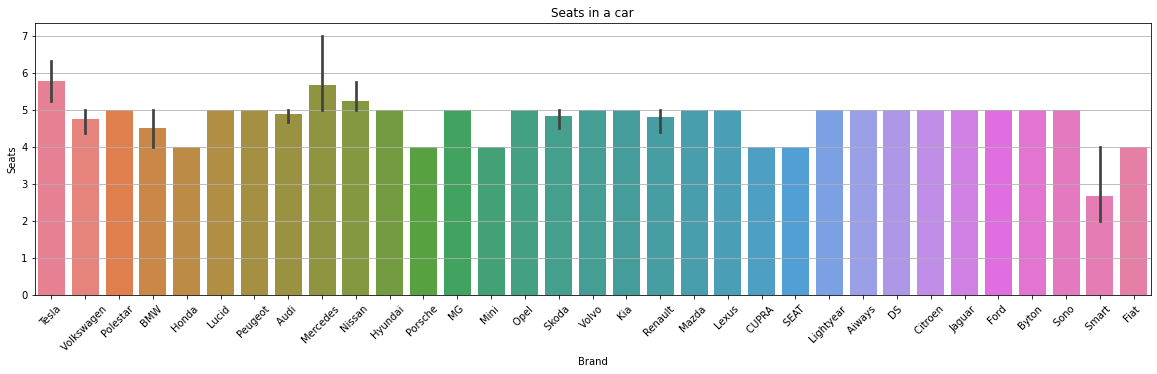

In [15]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

# Type of Plug used for charging

Text(0.5, 1.0, 'Plug Type')

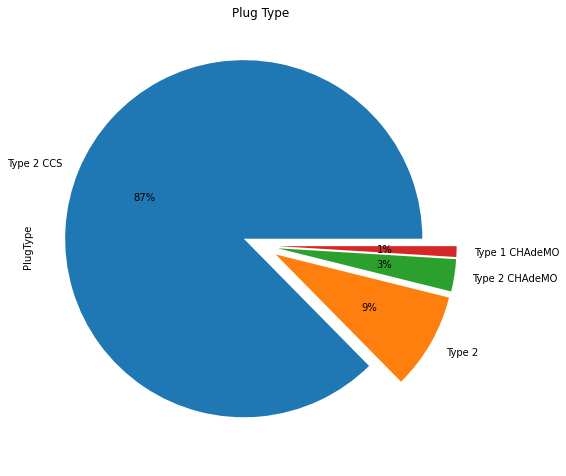

In [26]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

# Cars and their body style

Text(0.5, 1.0, 'Body Style')

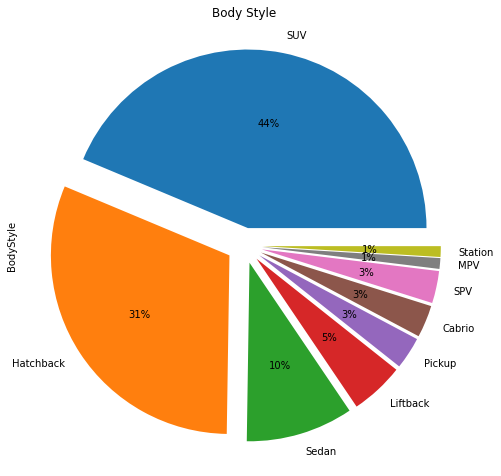

In [27]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Most cars are either SUV or Hatchback

# Segment in which the cars fall under

Text(0.5, 1.0, 'Segment')

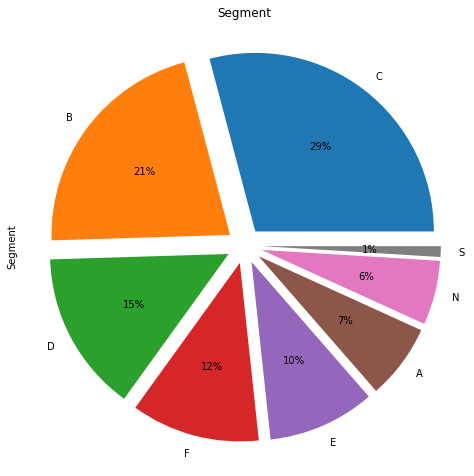

In [28]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either C or B type

# Number of Seats

Text(0.5, 1.0, 'Seats')

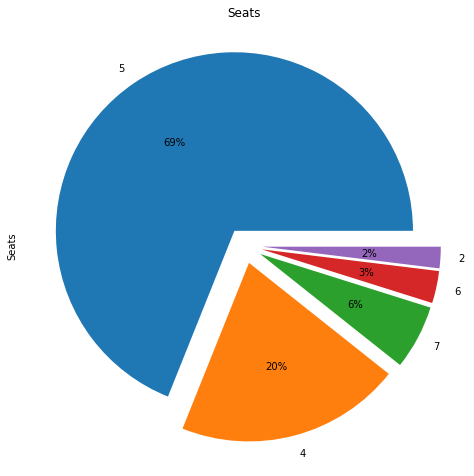

In [29]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats

# Putting independent variables as x and dependent variable as y

In [30]:
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm']]
y=df['PriceEuro']

In [32]:
import statsmodels.api as sm
x= sm.add_constant(x)
results = sm.OLS(y,x)

# Fitting the model and summarizing

In [33]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     60.28
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.37e-25
Time:                        19:26:10   Log-Likelihood:                -1156.8
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      98   BIC:                             2337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.051e+05    2.3e+04     -4.578      0.000   -1.51e+05   -5.96e+04
AccelSec         1482.2127   1033.219      1.435      0.155    -568.178    3532.603
Range_Km           37.7714     22.680      1.665      0.099      -7.236      82.779
TopSpeed_KmH      613.9243     78.224      7.848      0.000     458.691     769.157
Efficiency_WhKm   143.7166     68.228      2.106      0.038       8.320     279.113
==============================================================================
Omnibus:                       94.859   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1049.593
Skew:                           2.978   Prob(JB):                    1.21e-228
Kurtosis:                      17.460   Cond. No.                     5.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Only Top Speed and Efficieny are the two variables related to price

# Importing train test split from Scikit Learn

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

# Importing Linear regression

In [35]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# Finding out the R-squared value

In [36]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

78.35225979903606


Around 78% of the dependant variable has been explained by the independant variables

# Putting Yes value as 1 and No value as 0 for Logistic Regression

In [37]:
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [38]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

# Importing Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()

In [40]:
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

# Confusion Matrix of the regression

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  1],
       [ 0, 20]], dtype=int64)

# Finding out the accuracy score

In [42]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y1_test,pred1)
score*100

95.23809523809523

The data is accurate upto 95%